# В качестве фото использовался снимок огромного пельменя в межпланетаронм пространстве солнечной системы

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

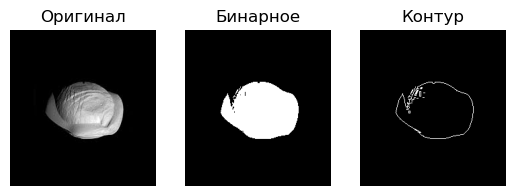

In [7]:
image =  cv2.imread('pic/Ind.jpg', cv2.COLOR_BGR2RGB)

plt.subplot(131)
plt.title('Оригинал')
plt.axis('off')
plt.imshow(image);

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img,30,255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

cont = np.zeros_like(img)
cv2.drawContours(cont, contours, -1, 255, 1)

plt.subplot(133)
plt.title('Контур')
plt.axis('off')
plt.imshow(cont, cmap='gray');

mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, 255, -1)

plt.subplot(132)
plt.title('Бинарное')
plt.axis('off')
plt.imshow(mask, cmap='gray');


Контур бинарного изображения обводим минимально возможным прямоугольником

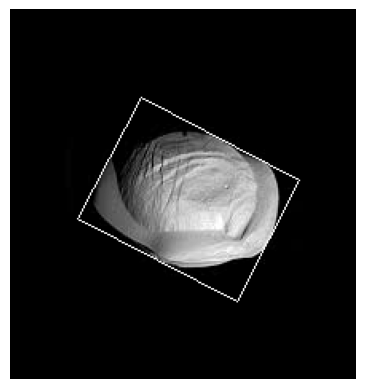

In [9]:
cnt = contours[0]
rect = cv2.minAreaRect(cnt)

box = cv2.boxPoints(rect)
box = np.intp(box)

imp = cv2.drawContours(img, [box], 0,255, 1)

plt.axis('off')
plt.imshow(imp, cmap='gray');

Выравниваем изображение

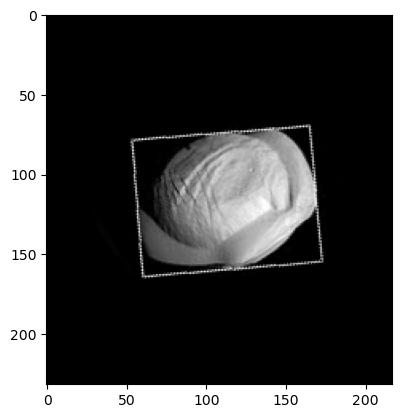

In [10]:
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),32.2,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst, cmap='gray');

Получаем новые контуры

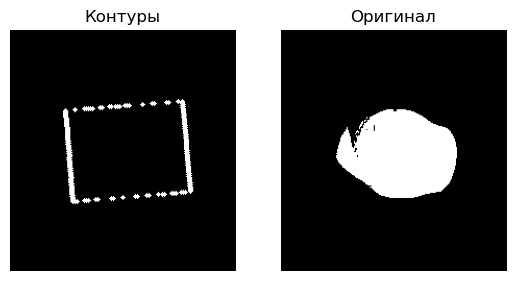

In [11]:
ret,thresh = cv2.threshold(dst,30,255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

cont = np.zeros_like(img)
cv2.drawContours(cont, contours[0], -1, 255, 3)

plt.subplot(121)
plt.title('Контуры')
plt.axis('off')
plt.imshow(cont, cmap='gray');

plt.subplot(122)
plt.title('Оригинал')
plt.axis('off')
plt.imshow(mask, cmap='gray');

Обрезаем всё, что не входит в контур

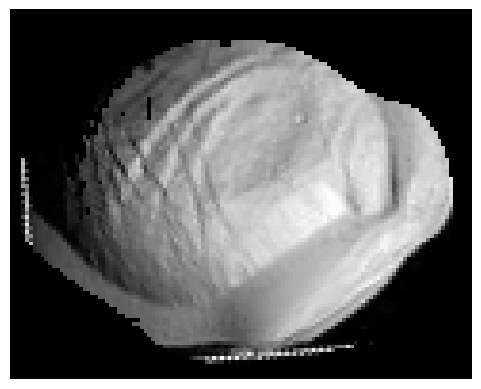

In [12]:
out = np.zeros_like(dst)
out[mask == 255] = dst[mask == 255]

(y, x) = np.where(mask == 255)
min_y = np.min(contours[0],  axis=0)[0][1]
min_x = np.min(contours[0],  axis=0)[0][0]
max_y = np.max(contours[0],  axis=0)[0][1]
max_x = np.max(contours[0],  axis=0)[0][0]

out = out[min_y:max_y+1, min_x:max_x+1]

plt.axis('off')
plt.imshow(out, cmap='gray');

Меняем размер изображения

200 100


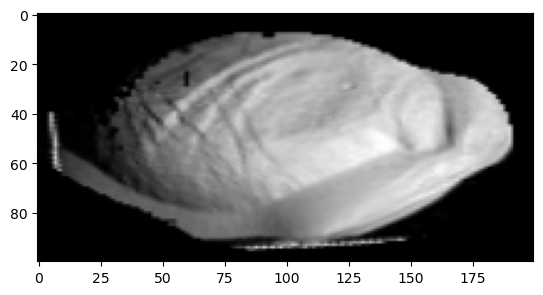

In [13]:
piece = cv2.resize(out, (200,100), interpolation=cv2.INTER_LINEAR)
(h, w) = piece.shape[:2]
print(w,h)
plt.imshow(piece, cmap='gray');

Производим аффинное преобразование изменённого изображения

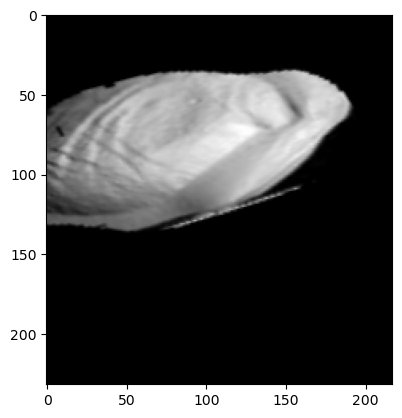

In [14]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(piece,M,(cols,rows))

plt.imshow(dst, cmap='gray');